In [1]:
options(jupyter.rich_display = FALSE)
options(repr.plot.width=6, repr.plot.height=4)

# Factors and categories

Consider the following data table:

|Name|Gender|Month of Birth|
|----|----|-----|
|Can|Male|January|
|Cem|Male|July|
|Hande|Female|May|
|Mehmet|Male|May|
|Deniz|Female|February|
|Kemal|Male|July|
|Derya|Female|May|
|Fatma|Female|April|

* All columns are strings.
* `Gender` and `Month of Birth` columns can be considered **categories**.

# Categories and levels

* A _categorical variable_ (factor) can take one of predetermined, discrete values.
    * Day of week
    * Month of year
    * Shirt sizes
* A single value of a categorical variable is called a _level_
    * Monday
    * December
    * XL

# Pause to think

Find three quantities that cannot be represented as a factor variable.

1. ...
2. ...
3. ...

Generate vectors to hold the relevant data.

In [2]:
name <- c("Can","Cem","Hande","Mehmet","Deniz","Kemal","Derya","Fatma")
gender <- c("Male","Male","Female","Male","Female","Male","Female","Female")
mode(gender)

[1] "character"

We can convert the `gender` vector to a factor variable using the `factor()` function.

In [3]:
gender_fac <- factor(gender)
gender_fac

[1] Male   Male   Female Male   Female Male   Female Female
Levels: Female Male

# Getting the levels of a factor

The factor vector  has an additional attribute, the _levels_ information.

In [4]:
levels(gender_fac)

[1] "Female" "Male"  

In [5]:
nlevels(gender_fac)

[1] 2

Also, common R functions for analysis and data description handles factors in specialized ways.

In [6]:
summary(gender)  # character vector

   Length     Class      Mode 
        8 character character 

In [7]:
summary(gender_fac) # factor

Female   Male 
     4      4 

One can change the level names easily using an assignment to the `levels()` function.

In [8]:
levels(gender_fac) <- c("F","M")
gender_fac

[1] M M F M F M F F
Levels: F M

Internally, categories are represented with integers starting at 1.

# Indexing and subsetting

Factor-valued vectors are subsetted in the same way as any other vector.

In [9]:
print(gender_fac[2:5])

[1] M F M F
Levels: F M


In [10]:
gender_fac[c(3,5,7:8)]

[1] F F F F
Levels: F M

Note that after subsetting a factor object, the object continues to store
all defined levels even if some of the levels are no longer represented in the
subsetted object.

# Filtering with factors

In [11]:
gender_fac

[1] M M F M F M F F
Levels: F M

In [12]:
gender_fac=="M"

[1]  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE

In [13]:
name[gender_fac=="M"]

[1] "Can"    "Cem"    "Mehmet" "Kemal" 

# Removing categories

Sometimes we may want to remove one level in a category. For example, consider the following factor where the same level is duplicated.

In [14]:
gender_fac <- factor(c("Male","Male","Female","Male","female","Male","female","Female"))
gender_fac

[1] Male   Male   Female Male   female Male   female Female
Levels: female Female Male

The factor has technically three levels, but actually `"female"` and `"Female"` are the same. Fix this by overwriting all occurrences of `"female"` with `"Female"`.

In [15]:
gender_fac[gender_fac=="female"] <- "Female"
gender_fac

[1] Male   Male   Female Male   Female Male   Female Female
Levels: female Female Male

However, the levels attribute still lists the invalid `"female"` category. To remove it, we use the `droplevels()` function. It removes all levels for which there are no entries.

In [16]:
gender_fac <- droplevels(gender_fac)
gender_fac

[1] Male   Male   Female Male   Female Male   Female Female
Levels: Female Male

# Nominal and ordinal factors
* The _gender_ factor is an example of a *nominal factor*: There is no inherent order between levels. We cannot ask the question whether "Male" is greater than "Female" or not.

* The _month of birth_ information is an *ordinal factor*: Months appear in a certain order, so it makes sense to say that "January" < "February".

|Name|Gender|Month of Birth|
|----|----|-----|
|Can|Male|January|
|Cem|Male|July|
|Hande|Female|May|
|Mehmet|Male|May|
|Deniz|Female|February|
|Kemal|Male|July|
|Derya|Female|May|
|Fatma|Female|April|

Let’s store the observed month-of-birth (MOB) data as a character vector.

In [17]:
mob <- c("January","July","May","May","February","July","May","April")

Two problems with this vector:

1. Only five unique months. Not all possible categories are represented.
2. Doesn’t reflect the natural order of the months. If you compare January and February to see which is greater, you get:

In [18]:
mob[1] < mob[5]  # alphabetical ordering

[1] FALSE

When we create a factor object, we can set `levels` parameter of the `factor()` function to ensure that it holds all the levels of the factor in the correct order.

In [19]:
months <- c("January","February","March","April","May",
            "June","July","August","September","October","November","December")

In [20]:
mob_fac <- factor(mob, levels=months, ordered=TRUE)
mob_fac

[1] January  July     May      May      February July     May      April   
12 Levels: January < February < March < April < May < June < ... < December

Comparisons can be done correctly:

In [21]:
mob_fac[1] < mob_fac[5]  # January < February

[1] TRUE

The `summary()` function gives a count of elements in each category.

In [22]:
summary(mob_fac)

  January  February     March     April       May      June      July    August 
        1         1         0         1         3         0         2         0 
September   October  November  December 
        0         0         0         0 

# Combining two factor objects

Earlier we have seen that combining two vectors into a single vector is done with the `c()` function:

In [23]:
x1 <- c(1,2,3,4)
x2 <- c(7,8,9)
c(x1, x2)

[1] 1 2 3 4 7 8 9

However, this does not work with factor objects:

In [24]:
mob_fac
mob2 <- factor(c("April","March","May"), levels=months, ordered=TRUE)
mob2

[1] January  July     May      May      February July     May      April   
12 Levels: January < February < March < April < May < June < ... < December

[1] April March May  
12 Levels: January < February < March < April < May < June < ... < December

In [25]:
c(mob_fac, mob2)

 [1] 1 7 5 5 2 7 5 4 4 3 5

`c()` combines the numeric values of categories. Not what we want.

Factors are combined in an indirect way: First use the result of `c()` to index the `months` vector, which holds an ordered list of all categories. This will give a character vector:

In [26]:
levels(mob_fac)[ c(mob_fac, mob2) ]

 [1] "January"  "July"     "May"      "May"      "February" "July"    
 [7] "May"      "April"    "April"    "March"    "May"     

Then we convert this to a factor object

In [27]:
factor(levels(mob_fac)[ c(mob_fac, mob2) ], levels=levels(mob_fac), ordered=TRUE)

 [1] January  July     May      May      February July     May      April   
 [9] April    March    May     
12 Levels: January < February < March < April < May < June < ... < December

If we need to use this task frequently, we can write a function for it:

In [28]:
concat_factors <- function(f1, f2, ordered=TRUE) {
    stopifnot( identical(levels(f1), levels(f2)) ) # ensure that the levels are the same
    return( factor(levels(f1)[ c(f1,f2) ], levels=levels(f1), ordered=ordered) )
}

In [29]:
concat_factors(mob_fac, mob2)

 [1] January  July     May      May      February July     May      April   
 [9] April    March    May     
12 Levels: January < February < March < April < May < June < ... < December

Binning
----
One can create categories from continuous data, such as Small/Medium/Large, or Low/High.

Example:

In [30]:
x <- c(11, 18, 36, 74, 43, 81, 95, 64, 32, 51)

Suppose we want to categorize this data as _small_ for values in [0, 30), _medium_ for [30, 70), and _high_ for [70, 100]. The notation [30,70) means that the value 30 belongs to this category, but 70 does not.

The `cut()` function generates a factor object with the interval end specified by the `breaks` parameter.

In [31]:
cut(x, breaks=c(0, 30, 70, 100))

 [1] (0,30]   (0,30]   (30,70]  (70,100] (30,70]  (70,100] (70,100] (30,70] 
 [9] (30,70]  (30,70] 
Levels: (0,30] (30,70] (70,100]

However, note that the ends of the intervals are not as we want. The first value of the boundary in not included in the interval, but the second value is.

To fix this, we set the parameter `right` to `FALSE`.

In [32]:
cut(x, breaks=c(0, 30, 70, 100), right = F)

 [1] [0,30)   [0,30)   [30,70)  [70,100) [30,70)  [70,100) [70,100) [30,70) 
 [9] [30,70)  [30,70) 
Levels: [0,30) [30,70) [70,100)

But the last value 100 is excluded now. We can include it by setting the `include.lowest` parameter to `TRUE`.

In [33]:
cut(x, breaks = c(0, 30, 70, 100), right = F, include.lowest = T)

 [1] [0,30)   [0,30)   [30,70)  [70,100] [30,70)  [70,100] [70,100] [30,70) 
 [9] [30,70)  [30,70) 
Levels: [0,30) [30,70) [70,100]

The levels can be set with the `labels` parameter.

In [ ]:
cut(x, breaks = c(0, 30, 70, 100), right = F, include.lowest = T,
   labels = c("Low","Medium","High"))

# Factors and data frames

Suppose that we create a data frame out of `names`, `gender`, and `mob` vectors:

In [34]:
df <- data.frame(name, gender, mob)
df

    name gender      mob
1    Can   Male  January
2    Cem   Male     July
3  Hande Female      May
4 Mehmet   Male      May
5  Deniz Female February
6  Kemal   Male     July
7  Derya Female      May
8  Fatma Female    April

See a summary of the dataframe:

In [35]:
summary(df)

      name      gender        mob   
 Can    :1   Female:4   April   :1  
 Cem    :1   Male  :4   February:1  
 Deniz  :1              January :1  
 Derya  :1              July    :2  
 Fatma  :1              May     :3  
 Hande  :1                          
 (Other):2                          

Note that all fields are interpreted as factors in `df`, including `names`. The reason is that the `stringsAsFactors`parameter is `TRUE` by default. We can turn it off, and use the factor vectors we prepared before:

In [36]:
df <- data.frame(name, gender_fac, mob_fac, stringsAsFactors = FALSE )
summary(df)

     name            gender_fac     mob_fac 
 Length:8           Female:4    May     :3  
 Class :character   Male  :4    July    :2  
 Mode  :character               January :1  
                                February:1  
                                April   :1  
                                March   :0  
                                (Other) :0  

As another example, consider the _mtcars_ data set:

In [37]:
head(mtcars)

                   mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1

The `summary()` function returns the summary statistics for each numeric field.

In [38]:
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

However, it makes more sense to treat `"cyl"`, `"vs"`, `"am"`, `"gear"` and `"carb"` as categorical variables.

In [39]:
mtcars$cyl <- factor(mtcars$cyl, ordered=TRUE)
mtcars$gear <- factor(mtcars$gear, ordered=TRUE)
mtcars$carb <- factor(mtcars$carb, ordered=TRUE)
mtcars$vs <- factor(mtcars$vs)
mtcars$am <- factor(mtcars$am)

Now we can use the `summary()` function to get the counts of categories in each factor field.

In [40]:
summary(mtcars)

      mpg        cyl         disp             hp             drat      
 Min.   :10.40   4:11   Min.   : 71.1   Min.   : 52.0   Min.   :2.760  
 1st Qu.:15.43   6: 7   1st Qu.:120.8   1st Qu.: 96.5   1st Qu.:3.080  
 Median :19.20   8:14   Median :196.3   Median :123.0   Median :3.695  
 Mean   :20.09          Mean   :230.7   Mean   :146.7   Mean   :3.597  
 3rd Qu.:22.80          3rd Qu.:326.0   3rd Qu.:180.0   3rd Qu.:3.920  
 Max.   :33.90          Max.   :472.0   Max.   :335.0   Max.   :4.930  
       wt             qsec       vs     am     gear   carb  
 Min.   :1.513   Min.   :14.50   0:18   0:19   3:15   1: 7  
 1st Qu.:2.581   1st Qu.:16.89   1:14   1:13   4:12   2:10  
 Median :3.325   Median :17.71                 5: 5   3: 3  
 Mean   :3.217   Mean   :17.85                        4:10  
 3rd Qu.:3.610   3rd Qu.:18.90                        6: 1  
 Max.   :5.424   Max.   :22.90                        8: 1  

The `"vs"` (V engine or straight) and `"am"` (Automatic or manual transmission) fields have level values 0 or 1. Let's replace them with clearer labels.

In [41]:
levels(mtcars$vs) <- c("V-engine","Standard")
levels(mtcars$am) <- c("Automatic","Manual")

In [42]:
summary(mtcars)

      mpg        cyl         disp             hp             drat      
 Min.   :10.40   4:11   Min.   : 71.1   Min.   : 52.0   Min.   :2.760  
 1st Qu.:15.43   6: 7   1st Qu.:120.8   1st Qu.: 96.5   1st Qu.:3.080  
 Median :19.20   8:14   Median :196.3   Median :123.0   Median :3.695  
 Mean   :20.09          Mean   :230.7   Mean   :146.7   Mean   :3.597  
 3rd Qu.:22.80          3rd Qu.:326.0   3rd Qu.:180.0   3rd Qu.:3.920  
 Max.   :33.90          Max.   :472.0   Max.   :335.0   Max.   :4.930  
       wt             qsec              vs             am     gear   carb  
 Min.   :1.513   Min.   :14.50   V-engine:18   Automatic:19   3:15   1: 7  
 1st Qu.:2.581   1st Qu.:16.89   Standard:14   Manual   :13   4:12   2:10  
 Median :3.325   Median :17.71                                5: 5   3: 3  
 Mean   :3.217   Mean   :17.85                                       4:10  
 3rd Qu.:3.610   3rd Qu.:18.90                                       6: 1  
 Max.   :5.424   Max.   :22.90          

# Plotting factor variables
When we specify a factor-type vector as data, the `plot()` function displays a bar plot.

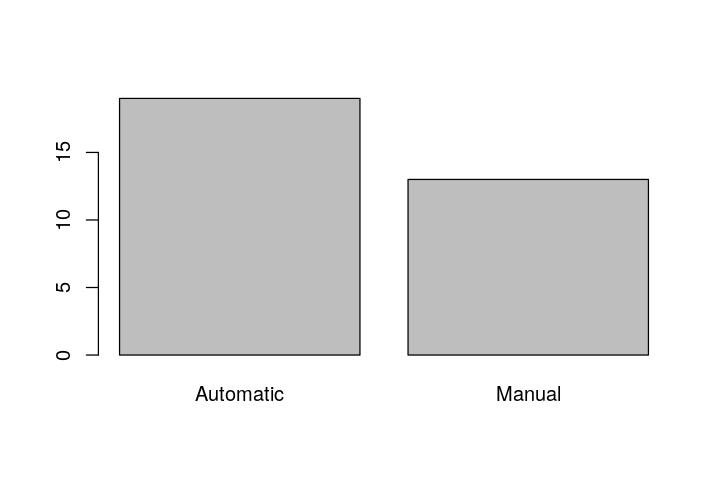

In [43]:
plot(mtcars$am)

When the x-axis is categorical and the y-axis is numerical, a boxplot is displayed.

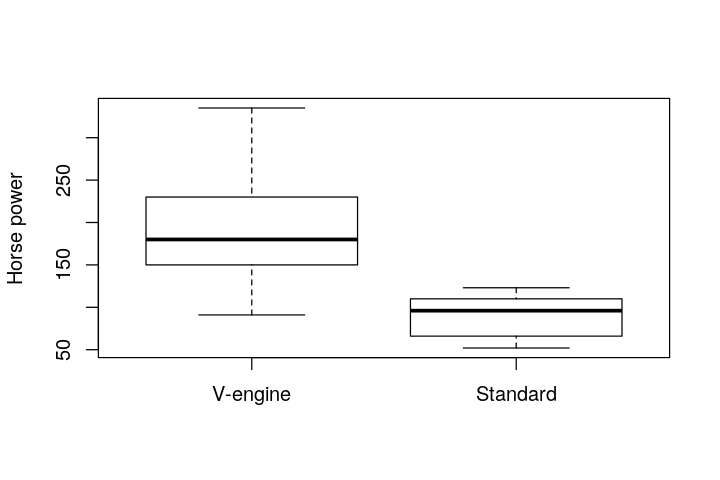

In [44]:
plot(x = mtcars$vs, y=mtcars$hp,ylab="Horse power")

If both axes are categorical, a stacked bar plot is displayed.

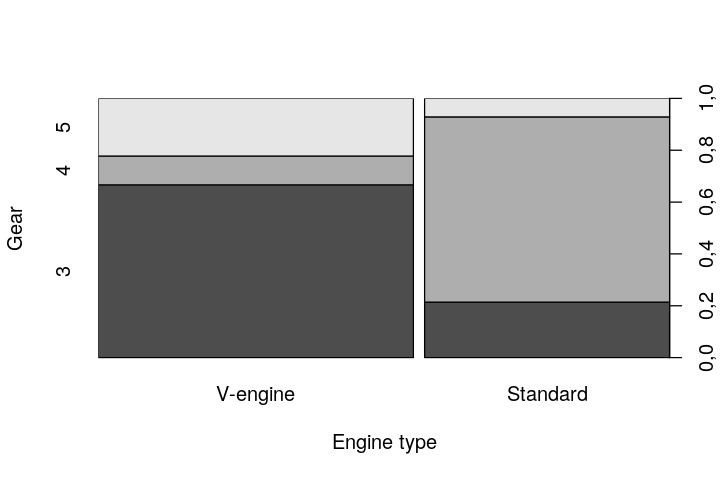

In [45]:
plot(x = mtcars$vs, y=mtcars$gear, xlab="Engine type",ylab="Gear")

# The `table()` function

The `table()` function can be used to return counts of elements in each level of a categorical variable.

In [97]:
affils <- c("R","D","D","R","U","D") # party affiliations
table(affils)

affils
D R U 
3 2 1 

It can be used to create *contingency tables*, such as *two-way tables*:

In [98]:
table(mtcars$am, mtcars$vs)

           
            V-engine Standard
  Automatic       12        7
  Manual           6        7

Or *three-way tables*:

In [104]:
table(mtcars$am, mtcars$vs, mtcars$gear,
      dnn=c("Transmission","Engine","Gears"))

, , Gears = 3

            Engine
Transmission V-engine Standard
   Automatic       12        3
   Manual           0        0

, , Gears = 4

            Engine
Transmission V-engine Standard
   Automatic        0        4
   Manual           2        6

, , Gears = 5

            Engine
Transmission V-engine Standard
   Automatic        0        0
   Manual           4        1


# The `tapply()` function

More general than `table()`. The function call `tapply(x, f, func)` breaks the vector `x` by levels given in `f` and applies the function `func` on each subgroup.

In [106]:
ages <- c(25, 26, 55, 37, 21, 42) # ages of some people
affils <- c("R","D","D","R","U","D") # party affiliations of the same people
tapply(ages, affils, mean)

 D  R  U 
41 31 21 

In [56]:
tapply(iris$Petal.Length, iris$Species, mean)

    setosa versicolor  virginica 
     1,462      4,260      5,552 

In [67]:
tapply(mtcars$mpg, mtcars$vs, mean)

V-engine Standard 
16,61667 24,55714 

In [72]:
tapply(mtcars$mpg, list(mtcars$vs, mtcars$am), mean)

         Automatic   Manual
V-engine  15,05000 19,75000
Standard  20,74286 28,37143

In [94]:
table(mtcars$am, mtcars$vs,)

, ,  = 3

           
            V-engine Standard
  Automatic       12        3
  Manual           0        0

, ,  = 4

           
            V-engine Standard
  Automatic        0        4
  Manual           2        6

, ,  = 5

           
            V-engine Standard
  Automatic        0        0
  Manual           4        1
